In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance/StudentsPerformance_with_headers.csv
/kaggle/input/students-performance/highereducationstudentsperformanceevaluation/DATA (1).csv


# > ***Evaluation of Decision Tree Classifier Performance on Sample Dataset with Varying Test Sizes***

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = pd.read_csv("/kaggle/input/students-performance/highereducationstudentsperformanceevaluation/DATA (1).csv")
file.drop("STUDENT ID",axis=1,inplace=True)
file.sample(5)

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
66,2,2,2,3,2,2,1,1,1,1,...,1,1,3,2,2,3,5,4,2,5
96,1,2,2,4,2,1,1,1,2,3,...,1,1,3,2,3,2,2,3,7,7
69,2,1,2,4,2,2,1,1,1,1,...,2,1,3,2,3,1,3,2,3,5
17,2,2,2,3,2,2,2,1,1,1,...,1,1,2,2,2,2,2,2,1,2
119,2,1,2,4,2,1,2,1,1,2,...,1,2,2,2,3,1,3,3,8,2


In [4]:
f = np.array(file)
X = file.iloc[:,:-1]
y = list(file.iloc[:,-1])

print(X.shape, len(y))

(145, 31) 145


In [5]:
clf = tree.DecisionTreeClassifier()

aris = []
precision_scores = []
f1_scores = []
j = [0.2,0.3,0.4,0.5]

In [6]:
for i in j:
    X_train, test_x, y_train, test_lab = train_test_split(X, y, test_size = i, random_state = 42)
    print(X_train.shape, test_x.shape, len(y_train), len(test_lab))
    
    clf = clf.fit(X_train, y_train)
    test_pred_deci_tree = clf.predict(test_x)
    
    print(test_pred_deci_tree, len(test_pred_deci_tree))
    print(test_lab, len(test_lab))
    
    print("ARI", adjusted_rand_score(test_pred_deci_tree, test_lab))
    aris.append(adjusted_rand_score(test_pred_deci_tree, test_lab))
    
    print("precision score: ", precision_score(test_pred_deci_tree, test_lab, average="weighted", zero_division=1))
    precision_scores.append(precision_score(test_pred_deci_tree, test_lab, average="weighted", zero_division=1))
    
    print("f1 score: ", f1_score(test_pred_deci_tree, test_lab, average="weighted", zero_division=1))
    f1_scores.append(f1_score(test_pred_deci_tree, test_lab, average="weighted", zero_division=1))
    
    print("confusion matrix: \n", confusion_matrix(test_pred_deci_tree, test_lab, labels=[0,1,2]))
    print("*****************************************************************")
    print("")

(116, 31) (29, 31) 116 29
[7 2 3 1 2 1 3 3 6 1 5 3 1 3 7 5 2 4 6 4 4 1 2 3 1 2 1 6 1] 29
[5, 5, 1, 3, 1, 1, 3, 6, 7, 2, 0, 3, 0, 4, 6, 2, 2, 3, 6, 7, 6, 0, 0, 5, 3, 3, 4, 4, 2] 29
ARI -0.054032127210773974
precision score:  0.22988505747126434
f1 score:  0.1869930835448077
confusion matrix: 
 [[0 0 0]
 [2 1 2]
 [1 1 1]]
*****************************************************************

(101, 31) (44, 31) 101 44
[6 2 1 1 2 1 1 3 6 3 2 3 1 3 5 2 3 1 7 6 5 1 1 3 5 1 5 6 5 1 2 1 1 1 4 2 2
 2 2 7 1 7 1 1] 44
[5, 5, 1, 3, 1, 1, 3, 6, 7, 2, 0, 3, 0, 4, 6, 2, 2, 3, 6, 7, 6, 0, 0, 5, 3, 3, 4, 4, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 7, 2, 6, 2, 1] 44
ARI 0.09739310950536947
precision score:  0.29545454545454547
f1 score:  0.2534965034965035
confusion matrix: 
 [[0 0 0]
 [4 5 3]
 [1 4 3]]
*****************************************************************

(87, 31) (58, 31) 87 58
[7 2 2 2 1 2 0 3 6 3 1 4 0 3 5 4 2 5 7 7 6 0 1 5 1 3 1 7 2 1 2 5 0 1 1 1 3
 1 1 7 1 7 1 3 5 4 2 7 5 5 4 4 6 5 4 7 5 3] 58
[5

In [7]:
j1 = ["0.2","0.3","0.4","0.5"]
print(aris)
print(precision_scores)
print(f1_scores)

[-0.054032127210773974, 0.09739310950536947, 0.0360428149513723, 0.05316496420815572]
[0.22988505747126434, 0.29545454545454547, 0.2792077175697866, 0.3164383561643836]
[0.1869930835448077, 0.2534965034965035, 0.24701074787281685, 0.2832191130909646]


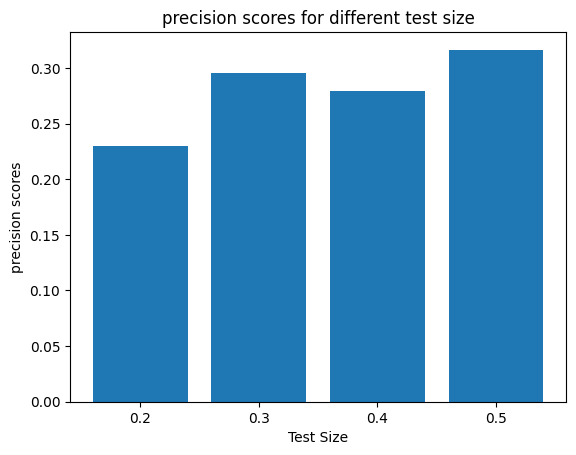

In [8]:
# plotting precision scores

fig = plt.figure()
plt.bar(j1, precision_scores)
plt.xlabel("Test Size")
plt.ylabel("precision scores")
plt.title("precision scores for different test size")
plt.show()

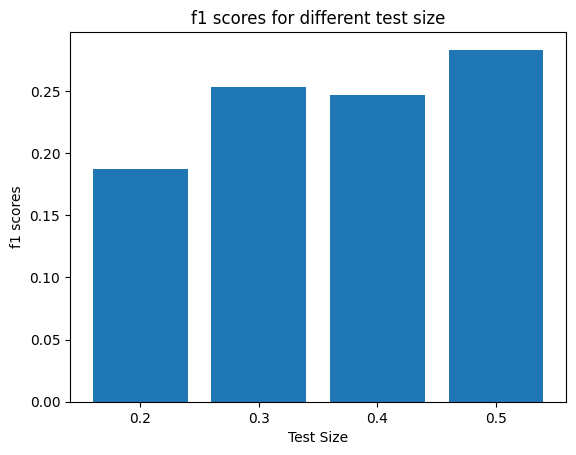

In [9]:
# plotting f1 scores

fig = plt.figure()
plt.bar(j1, f1_scores)
plt.xlabel("Test Size")
plt.ylabel("f1 scores")
plt.title("f1 scores for different test size")
plt.show()